# Challenge Q2

In [1]:
import numpy as np
import random
import itertools
from collections import Counter 
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## probability that I will buy a yacht, for m = 10

In [2]:
def getProbabilityFromPreviousConsultant(current, previous, p, c):
    if current == 1 and previous == 1: ## 11 -> 1
        return c + p -(c*p)
    elif current == -1 and previous == 1: ## 1 -1 ->0
        return 1 - (c + p -(c*p))
    elif current == -1 and previous == -1: #-1 -1 >1
        return (c*p) -p + 1
    elif current == 1 and previous == -1: 
        return p -(c*p)

In [3]:
m = 10
allPermutations = list(itertools.product([-1, 1], repeat=m))

cpValues = [
    [0,0],    
    [-0.25, 0.25],
    [0.25,0.25],
    [0.5,0.25],
    [0.75,0.25],  
    [1,0.25],
    [-0.25, 0.5],
    [0.25,0.5],  
    [0.5,0.5],  
    [0.75,0.5],
    [1,0.5],  
    [-0.25, 0.75],
    [0.25,0.75],
    [0.5,0.75],
    [0.75,0.75],   
    [1,1],
]
results = []
for cpValue in cpValues:    
    c,p = cpValue[0], cpValue[1]
    ## checking if probbabilities lie in the range 0-1
    if 0<=c + p -(c*p)<=1 and 0<=1-(c + p -(c*p))<=1 and 0<=(c*p) -p + 1<=1 and 0<=p -(c*p)<=1:            
        total = 0
        for permutation in allPermutations: #[1,1,1]
            frequencyMap = Counter(permutation)
            totalProbabilityForThisPermutation = 0
            if frequencyMap[1]>(m/2):                
                for index in range(len(permutation)):
                    # For 1st advisor
                    if index == 0:
                        if permutation[index] == 1:
                            totalProbabilityForThisPermutation += p
                            continue
                        else:
                            totalProbabilityForThisPermutation += (1-p)
                            continue
                    # For the rest    
                    totalProbabilityForThisPermutation *= getProbabilityFromPreviousConsultant(permutation[index],
                                                                                               permutation[index-1],
                                                                                               p,c)
                total += (totalProbabilityForThisPermutation)
        results.append([c,
                       p,
                       m,
                       total])
columns = ['c',
           'p',
           'm',
           'probability']
df = pd.DataFrame(results, columns=columns)
print(tabulate(df.set_index('c'), headers='keys', tablefmt='psql'))

+-------+------+-----+---------------+
|     c |    p |   m |   probability |
|-------+------+-----+---------------|
|  0    | 0    |  10 |    0          |
| -0.25 | 0.25 |  10 |    0.00194145 |
|  0.25 | 0.25 |  10 |    0.0553765  |
|  0.5  | 0.25 |  10 |    0.108958   |
|  0.75 | 0.25 |  10 |    0.179941   |
|  1    | 0.25 |  10 |    0.25       |
| -0.25 | 0.5  |  10 |    0.34174    |
|  0.25 | 0.5  |  10 |    0.405044   |
|  0.5  | 0.5  |  10 |    0.430332   |
|  0.75 | 0.5  |  10 |    0.457382   |
|  1    | 0.5  |  10 |    0.5        |
| -0.25 | 0.75 |  10 |    0.970681   |
|  0.25 | 0.75 |  10 |    0.869105   |
|  0.5  | 0.75 |  10 |    0.813797   |
|  0.75 | 0.75 |  10 |    0.76134    |
|  1    | 1    |  10 |    1          |
+-------+------+-----+---------------+


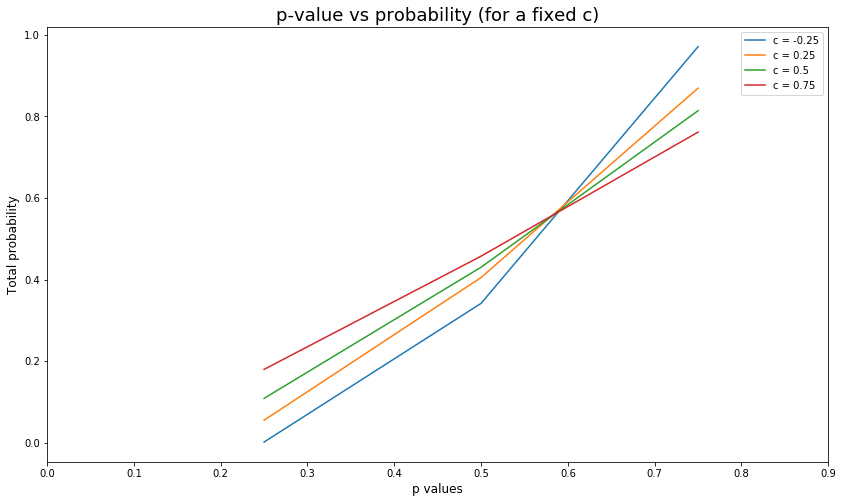

In [4]:
plt.figure(figsize=(14,8))
validation = [1,2,3,4,5]

plt.plot(list(df.loc[df['c'] == -0.25]['p']), list(df.loc[df['c'] == -0.25]['probability']), label='c = -0.25')
plt.plot(list(df.loc[df['c'] == 0.25]['p']), list(df.loc[df['c'] == 0.25]['probability']), label='c = 0.25')
plt.plot(list(df.loc[df['c'] == 0.5]['p']), list(df.loc[df['c'] == 0.5]['probability']), label='c = 0.5')
plt.plot(list(df.loc[df['c'] == 0.75]['p']), list(df.loc[df['c'] == 0.75]['probability']), label='c = 0.75')
plt.xlabel('p values',fontsize=12) # Label x-axis
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Total probability',fontsize=12) # Label y-axis
plt.title('p-value vs probability (for a fixed c)',fontsize=18) # Label y-axis
plt.legend() # Show plot labels as legend
plt.show()

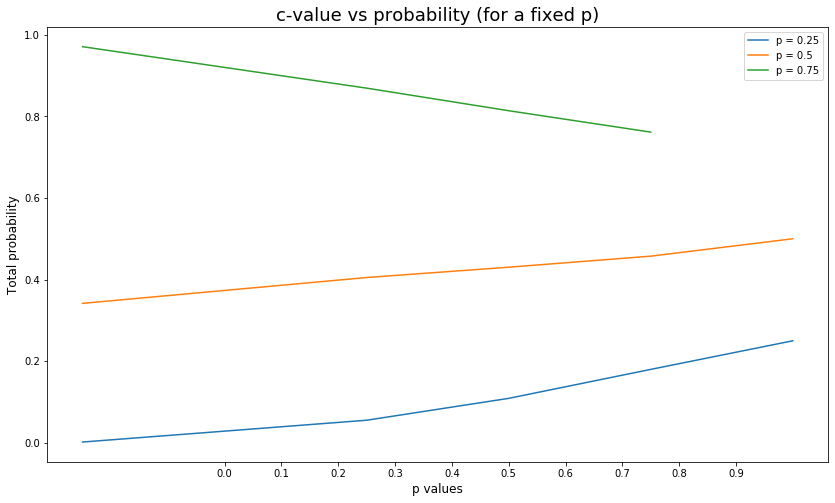

In [5]:
plt.figure(figsize=(14,8))
validation = [1,2,3,4,5]

plt.plot(list(df.loc[df['p'] == 0.25]['c']), list(df.loc[df['p'] == 0.25]['probability']), label='p = 0.25')
plt.plot(list(df.loc[df['p'] == 0.5]['c']), list(df.loc[df['p'] == 0.5]['probability']), label='p = 0.5')
plt.plot(list(df.loc[df['p'] == 0.75]['c']), list(df.loc[df['p'] == 0.75]['probability']), label='p = 0.75')
plt.xlabel('p values',fontsize=12) # Label x-axis
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Total probability',fontsize=12) # Label y-axis
plt.title('c-value vs probability (for a fixed p)',fontsize=18) # Label y-axis
plt.legend() # Show plot labels as legend
plt.show()

## Comments

We have generated all the 2<sup>10</sup> = 1024 possibilities.

We have only considered cases where there > 5(10/2) 1's.

**Probability increases as p increases for a fixed c**

## Simulate the sequential advisers,

In [6]:
# We will run the experiment for 10,000 times

In [7]:
def getNextConsultantValue(previousConsultant,
                           p,
                           c):
    if previousConsultant == 1:
        pValue = c + p -(c*p) # This is the probability for (1,1)
        return np.random.choice([-1, 1], p=[1-pValue,pValue])
    else:
        pValue = (c*p) -p + 1 # This is the probability for (-1,-1)
        return np.random.choice([-1, 1], p=[pValue,1-pValue])

In [8]:
numberOftrials = 10000

cpValues = [
    [0,0],
    [0.25,0.25],
    [0.5,0.5],   
    [0.75,0.25],
    [0.75,0.75],
    [1,1],
]

mValues = [25,100]

for m in mValues:
    results = []
    for cpValue in cpValues:
        cValue,pValue = cpValue[0], cpValue[1]
        if (0<= cValue+pValue-(cValue*pValue)<=1 and
            0<= 1-(cValue+pValue-(cValue*pValue))<=1 and
            0<=(cValue*pValue)-pValue+1 <=1 and 
            0<= pValue-(cValue*pValue)<= 1):

            permutations = []
            buyAYacht = 0

            for i in range(numberOftrials):

                permutations.append([])
                for index in range(m):
                    if index == 0:
                        firstConsultant = np.random.choice([-1, 1], p=[1-pValue,pValue])
                        permutations[i].append(firstConsultant)
                    else:
                        previousConsultant = permutations[i][index-1]
                        nextConsultant = getNextConsultantValue(previousConsultant,
                                                               pValue,
                                                               cValue)
                        permutations[i].append(nextConsultant)
                frequencyMap = Counter(permutations[i])
                if frequencyMap[1] >= m/2:
                    buyAYacht += 1
            results.append([cValue,
                            pValue,
                            m,
                            numberOftrials,
                            buyAYacht/numberOftrials])

            
    columns = ['c',
               'p',
               'm',
               'numberOfTrials',
               'probability of buying a yacht'
              ]
    df = pd.DataFrame(results, columns=columns)
    print(tabulate(df.set_index('c'), headers='keys', tablefmt='psql'))                    

+------+------+-----+------------------+---------------------------------+
|    c |    p |   m |   numberOfTrials |   probability of buying a yacht |
|------+------+-----+------------------+---------------------------------|
| 0    | 0    |  25 |            10000 |                          0      |
| 0.25 | 0.25 |  25 |            10000 |                          0.0168 |
| 0.5  | 0.5  |  25 |            10000 |                          0.5019 |
| 0.75 | 0.25 |  25 |            10000 |                          0.1399 |
| 0.75 | 0.75 |  25 |            10000 |                          0.8638 |
| 1    | 1    |  25 |            10000 |                          1      |
+------+------+-----+------------------+---------------------------------+
+------+------+-----+------------------+---------------------------------+
|    c |    p |   m |   numberOfTrials |   probability of buying a yacht |
|------+------+-----+------------------+---------------------------------|
| 0    | 0    | 100 |    